In [1]:
import keras
keras.__version__

'3.10.0'

# Overfitting and underfitting

This notebook contains the code samples found in Chapter 4, of [Deep Learning with Python](https://www.manning.com/books/deep-learning-with-python?a_aid=keras&a_bid=76564dff).

----


In the examples we saw previously-- movie review sentiment prediction, and house price regression -- 
we could notice that the performance of our model on the held-out validation data would always peak after a few epochs and would then start 
degrading, i.e. our model would quickly start to _overfit_ to the training data. 
To prevent a model from learning misleading or irrelevant patterns found in the training data, _the best solution is of course to get 
more training data_. 


We will use the IMDB test set as our validation set.

Let's prepare the data.

In [2]:
from keras.datasets import imdb
import numpy as np

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # set specific indices of results[i] to 1s
    return results

# Our vectorized training data
x_train = vectorize_sequences(train_data)
# Our vectorized test data
x_test = vectorize_sequences(test_data)
# Our vectorized labels
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

# Fighting overfitting

## Reducing the network's size


The simplest way to prevent overfitting is to reduce the size of the model, i.e. the number of learnable parameters in the model (which is 
determined by the number of layers and the number of units per layer). 
Let's try this on our movie review classification network. Our original network was as such:

In [3]:
from keras import models
from keras import layers

original_model = models.Sequential()
original_model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
original_model.add(layers.Dense(16, activation='relu'))
original_model.add(layers.Dense(1, activation='sigmoid'))

original_model.compile(optimizer='rmsprop',
                       loss='binary_crossentropy',
                       metrics=['acc'])

/opt/anaconda3/envs/cscie89/lib/python3.12/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Replace this network with a smaller network:

In [4]:
smaller_model = models.Sequential()
smaller_model.add(layers.Dense(4, activation='relu', input_shape=(10000,)))
smaller_model.add(layers.Dense(4, activation='relu'))
smaller_model.add(layers.Dense(1, activation='sigmoid'))

smaller_model.compile(optimizer='rmsprop',
                      loss='binary_crossentropy',
                      metrics=['acc'])


Here's a comparison of the validation losses of the original network and the smaller network. The dots are the validation loss values of 
the smaller network, and the crosses are the initial network (remember: a lower validation loss signals a better model).

In [5]:
original_hist = original_model.fit(x_train, y_train,
                                   epochs=20,
                                   batch_size=512,
                                   validation_data=(x_test, y_test))

Epoch 1/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - acc: 0.7293 - loss: 0.5592 - val_acc: 0.8621 - val_loss: 0.3613
Epoch 2/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.8975 - loss: 0.2876 - val_acc: 0.8622 - val_loss: 0.3339
Epoch 3/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.9232 - loss: 0.2137 - val_acc: 0.8878 - val_loss: 0.2813
Epoch 4/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.9377 - loss: 0.1778 - val_acc: 0.8870 - val_loss: 0.2873
Epoch 5/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.9502 - loss: 0.1442 - val_acc: 0.8822 - val_loss: 0.3012
Epoch 6/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.9519 - loss: 0.1378 - val_acc: 0.8771 - val_loss: 0.3268
Epoch 7/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.9604 - loss: 0.1169 - val_acc: 0.8740 - val_loss: 0.3427
Epoch 8/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.9678 - loss: 0.1022 - val_acc: 0.8737 - val_loss: 0.3674
Epoch 9/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.9691 - loss:

In [6]:
smaller_model_hist = smaller_model.fit(x_train, y_train,
                                       epochs=20,
                                       batch_size=512,
                                       validation_data=(x_test, y_test))

Epoch 1/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - acc: 0.6298 - loss: 0.6367 - val_acc: 0.7335 - val_loss: 0.5504
Epoch 2/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.8245 - loss: 0.5142 - val_acc: 0.8236 - val_loss: 0.5019
Epoch 3/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.8750 - loss: 0.4607 - val_acc: 0.8641 - val_loss: 0.4752
Epoch 4/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.9004 - loss: 0.4278 - val_acc: 0.8760 - val_loss: 0.4598
Epoch 5/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.9189 - loss: 0.3967 - val_acc: 0.8775 - val_loss: 0.4487
Epoch 6/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.9317 - loss: 0.3795 - val_acc: 0.8770 - val_loss: 0.4421
Epoch 7/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.9410 - loss: 0.3621 - val_acc: 0.8780 - val_loss: 0.4363
Epoch 8/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.9476 - loss: 0.3445 - val_acc: 0.8689 - val_loss: 0.4463
Epoch 9/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.9515 - loss:

In [7]:
epochs = range(1, 21)
original_val_loss = original_hist.history['val_loss']
smaller_model_val_loss = smaller_model_hist.history['val_loss']

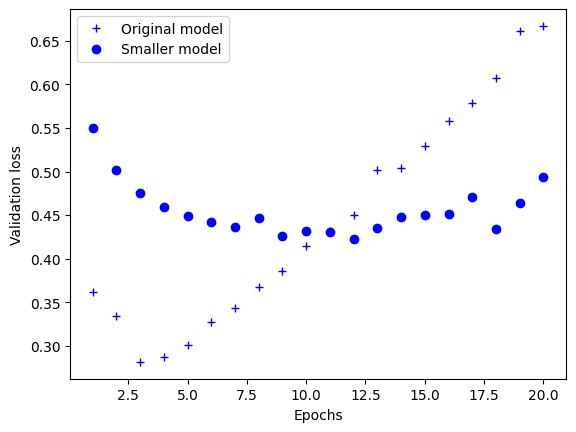

In [8]:
import matplotlib.pyplot as plt

# b+ is for "blue cross"
plt.plot(epochs, original_val_loss, 'b+', label='Original model')
# "bo" is for "blue dot"
plt.plot(epochs, smaller_model_val_loss, 'bo', label='Smaller model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()


As you can see, the smaller network starts overfitting later than the reference one (after 6 epochs rather than 4) and its performance 
degrades much more slowly once it starts overfitting.

Now, for kicks, let's add to this benchmark a network that has much more capacity, far more than the problem would warrant:

In [9]:
bigger_model = models.Sequential()
bigger_model.add(layers.Dense(512, activation='relu', input_shape=(10000,)))
bigger_model.add(layers.Dense(512, activation='relu'))
bigger_model.add(layers.Dense(1, activation='sigmoid'))

bigger_model.compile(optimizer='rmsprop',
                     loss='binary_crossentropy',
                     metrics=['acc'])

In [10]:
bigger_model_hist = bigger_model.fit(x_train, y_train,
                                     epochs=20,
                                     batch_size=512,
                                     validation_data=(x_test, y_test))

Epoch 1/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - acc: 0.6803 - loss: 0.5943 - val_acc: 0.8642 - val_loss: 0.3325
Epoch 2/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - acc: 0.8847 - loss: 0.2837 - val_acc: 0.8888 - val_loss: 0.2692
Epoch 3/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - acc: 0.9162 - loss: 0.2081 - val_acc: 0.8459 - val_loss: 0.3613
Epoch 4/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - acc: 0.9313 - loss: 0.1735 - val_acc: 0.8504 - val_loss: 0.3759
Epoch 5/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - acc: 0.9529 - loss: 0.1228 - val_acc: 0.8806 - val_loss: 0.3286
Epoch 6/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - acc: 0.9675 - loss: 0.0889 - val_acc: 0.8810 - val_loss: 0.3146
Epoch 7/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - acc: 0.9874 - loss: 0.0455 - val_acc: 0.8472 - val_loss: 0.4181
Epoch 8/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - acc: 0.9930 - loss: 0.0345 - val_acc: 0.8812 - val_loss: 0.4008
Epoch 9/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - acc: 0.9956

Here's how the bigger network fares compared to the reference one. The dots are the validation loss values of the bigger network, and the 
crosses are the initial network.

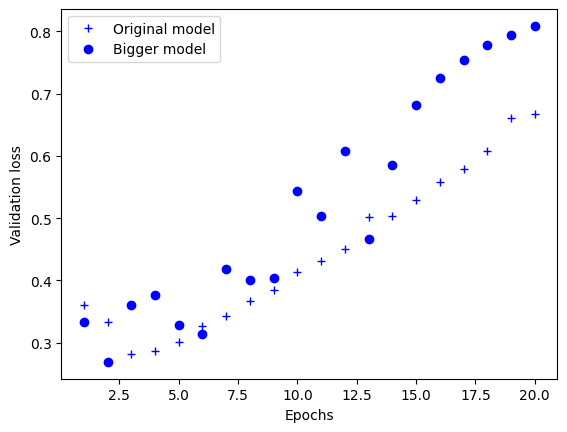

In [11]:
bigger_model_val_loss = bigger_model_hist.history['val_loss']

plt.plot(epochs, original_val_loss, 'b+', label='Original model')
plt.plot(epochs, bigger_model_val_loss, 'bo', label='Bigger model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()


The bigger network starts overfitting almost right away, after just one epoch, and overfits much more severely. Its validation loss is also 
more noisy.

Meanwhile, here are the training losses for our two networks:

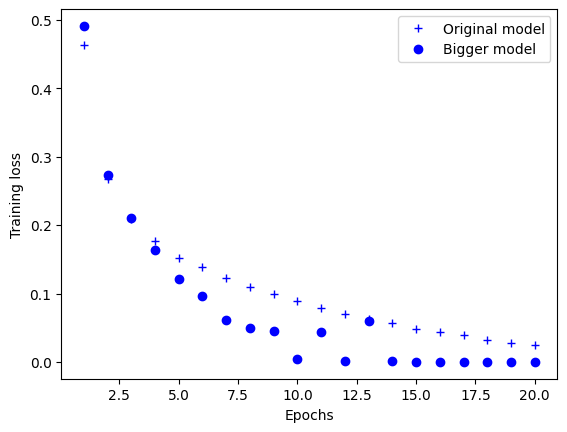

In [12]:
original_train_loss = original_hist.history['loss']
bigger_model_train_loss = bigger_model_hist.history['loss']

plt.plot(epochs, original_train_loss, 'b+', label='Original model')
plt.plot(epochs, bigger_model_train_loss, 'bo', label='Bigger model')
plt.xlabel('Epochs')
plt.ylabel('Training loss')
plt.legend()

plt.show()

As you can see, the bigger network gets its training loss near zero very quickly. The more capacity the network has, the quicker it will be 
able to model the training data (resulting in a low training loss), but the more susceptible it is to overfitting (resulting in a large 
difference between the training and validation loss).

## Adding weight regularization


A common way to mitigate overfitting is to put constraints on the complexity 
of a network by forcing its weights to only take small values, which makes the distribution of weight values more "regular". This is called 
"weight regularization", and it is done by adding to the loss function of the network a _cost_ associated with having large weights. This 
cost comes in two flavors:

* L1 regularization, where the cost added is proportional to the _absolute value of the weights coefficients_ (i.e. to what is called the 
"L1 norm" of the weights).
* L2 regularization, where the cost added is proportional to the _square of the value of the weights coefficients_ (i.e. to what is called 
the "L2 norm" of the weights). L2 regularization is also called _weight decay_ in the context of neural networks. Don't let the different 
name confuse you: weight decay is mathematically the exact same as L2 regularization.

In Keras, weight regularization is added by passing _weight regularizer instances_ to layers as keyword arguments. Let's add L2 weight 
regularization to our movie review classification network:

In [13]:
from keras import regularizers

l2_model = models.Sequential()
l2_model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001),
                          activation='relu', input_shape=(10000,)))
l2_model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001),
                          activation='relu'))
l2_model.add(layers.Dense(1, activation='sigmoid'))

In [14]:
l2_model.compile(optimizer='rmsprop',
                 loss='binary_crossentropy',
                 metrics=['acc'])

`l2(0.001)` means that every coefficient in the weight matrix of the layer will add `0.001 * weight_coefficient_value` to the total loss of 
the network. Note that because this penalty is _only added at training time_, the loss for this network will be much higher at training 
than at test time.

Here's the impact of our L2 regularization penalty:

In [15]:
l2_model_hist = l2_model.fit(x_train, y_train,
                             epochs=20,
                             batch_size=512,
                             validation_data=(x_test, y_test))

Epoch 1/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - acc: 0.7334 - loss: 0.6039 - val_acc: 0.8277 - val_loss: 0.4521
Epoch 2/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.8976 - loss: 0.3464 - val_acc: 0.8756 - val_loss: 0.3565
Epoch 3/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.9157 - loss: 0.2787 - val_acc: 0.8886 - val_loss: 0.3265
Epoch 4/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.9309 - loss: 0.2451 - val_acc: 0.8870 - val_loss: 0.3289
Epoch 5/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.9359 - loss: 0.2296 - val_acc: 0.8847 - val_loss: 0.3376
Epoch 6/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.9433 - loss: 0.2159 - val_acc: 0.8836 - val_loss: 0.3454
Epoch 7/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.9468 - loss: 0.2101 - val_acc: 0.8754 - val_loss: 0.3662
Epoch 8/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.9452 - loss: 0.2056 - val_acc: 0.8787 - val_loss: 0.3593
Epoch 9/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.9490 - loss:

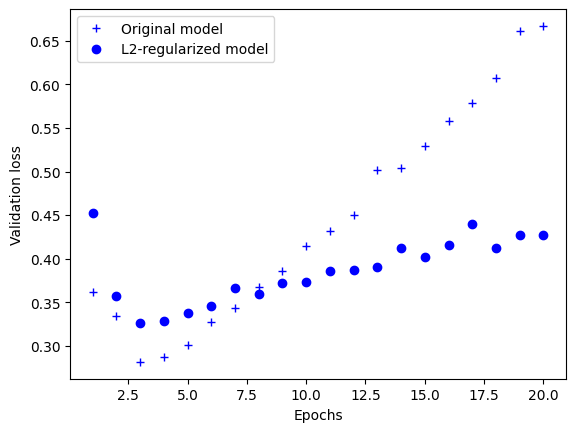

In [16]:
l2_model_val_loss = l2_model_hist.history['val_loss']

plt.plot(epochs, original_val_loss, 'b+', label='Original model')
plt.plot(epochs, l2_model_val_loss, 'bo', label='L2-regularized model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()



As you can see, the model with L2 regularization (dots) has become much more resistant to overfitting than the reference model (crosses), 
even though both models have the same number of parameters.

As alternatives to L2 regularization, you could use one of the following Keras weight regularizers:

In [17]:
from keras import regularizers

# L1 regularization
regularizers.l1(0.001)

# L1 and L2 regularization at the same time
regularizers.l1_l2(l1=0.001, l2=0.001)

## Adding dropout


Dropout is one of the most effective and most commonly used regularization techniques for neural networks, developed by Hinton and his 
students at the University of Toronto. Dropout, applied to a layer, consists of randomly "dropping out" (i.e. setting to zero) a number of 
output features of the layer during training. Let's say a given layer would normally have returned a vector `[0.2, 0.5, 1.3, 0.8, 1.1]` for a 
given input sample during training; after applying dropout, this vector will have a few zero entries distributed at random, e.g. `[0, 0.5, 
1.3, 0, 1.1]`. The "dropout rate" is the fraction of the features that are being zeroed-out; it is usually set between 0.2 and 0.5. At test 
time, no units are dropped out, and instead the layer's output values are scaled down by a factor equal to the dropout rate, so as to 
balance for the fact that more units are active than at training time.



This technique may seem strange and arbitrary. Why would this help reduce overfitting? Geoff Hinton has said that he was inspired, among 
other things, by a fraud prevention mechanism used by banks -- in his own words: _"I went to my bank. The tellers kept changing and I asked 
one of them why. He said he didn’t know but they got moved around a lot. I figured it must be because it would require cooperation 
between employees to successfully defraud the bank. This made me realize that randomly removing a different subset of neurons on each 
example would prevent conspiracies and thus reduce overfitting"_.

The core idea is that introducing noise in the output values of a layer can break up happenstance patterns that are not significant (what 
Hinton refers to as "conspiracies"), which the network would start memorizing if no noise was present. 

In Keras you can introduce dropout in a network via the `Dropout` layer, which gets applied to the output of layer right before it, e.g.:

In [20]:
dpt_model = models.Sequential()
dpt_model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
dpt_model.add(layers.Dropout(0.5))
dpt_model.add(layers.Dense(16, activation='relu'))
dpt_model.add(layers.Dropout(0.5))
dpt_model.add(layers.Dense(1, activation='sigmoid'))

dpt_model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['acc'])

In [21]:
dpt_model_hist = dpt_model.fit(x_train, y_train,
                               epochs=20,
                               batch_size=512,
                               validation_data=(x_test, y_test))

Epoch 1/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - acc: 0.6135 - loss: 0.6456 - val_acc: 0.8626 - val_loss: 0.4406
Epoch 2/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.8027 - loss: 0.4619 - val_acc: 0.8798 - val_loss: 0.3364
Epoch 3/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.8659 - loss: 0.3555 - val_acc: 0.8889 - val_loss: 0.2888
Epoch 4/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.8937 - loss: 0.2957 - val_acc: 0.8878 - val_loss: 0.2765
Epoch 5/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.9139 - loss: 0.2515 - val_acc: 0.8894 - val_loss: 0.2779
Epoch 6/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.9243 - loss: 0.2221 - val_acc: 0.8831 - val_loss: 0.2920
Epoch 7/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.9342 - loss: 0.1914 - val_acc: 0.8822 - val_loss: 0.3128
Epoch 8/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.9372 - loss: 0.1809 - val_acc: 0.8846 - val_loss: 0.3128
Epoch 9/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.9437 - loss:

Let's plot the results:

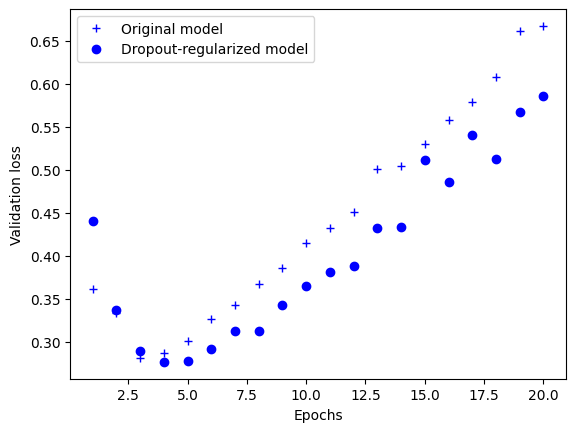

In [22]:
dpt_model_val_loss = dpt_model_hist.history['val_loss']

plt.plot(epochs, original_val_loss, 'b+', label='Original model')
plt.plot(epochs, dpt_model_val_loss, 'bo', label='Dropout-regularized model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()


Again, a clear improvement over the reference network.

To recap: here the most common ways to prevent overfitting in neural networks:

* Getting more training data.
* Reducing the capacity of the network.
* Adding weight regularization.
* Adding dropout.